In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [3]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector


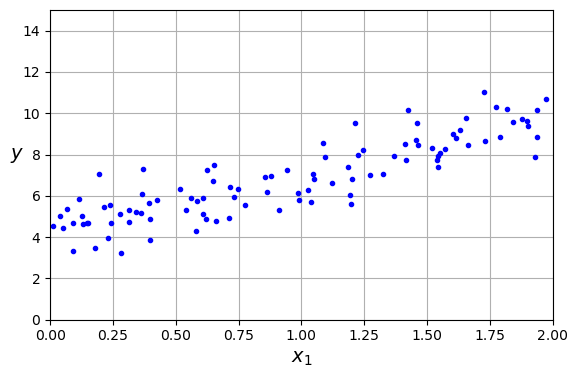

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()


In [5]:
from sklearn.preprocessing import add_dummy_feature

# Nous ajoutons la valeur biais = 1 à chaque instance
X_b = add_dummy_feature(X)
# Nous utilisons la fonction inv() pour inverser la matrice, et la fonction @ pour réaliser le produit matriciel
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y


In [6]:
theta_best


array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict


array([[4.21509616],
       [9.75532293]])

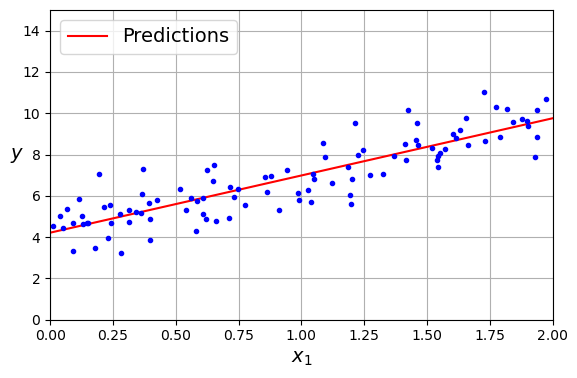

In [8]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()


In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [10]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)  # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [11]:
theta


array([[4.21509616],
       [2.77011339]])

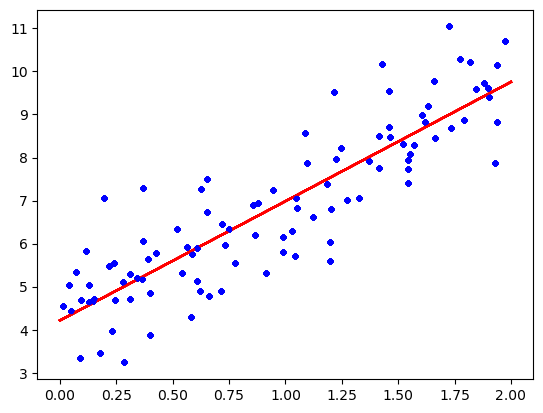

In [12]:
etas = [0.02, 0.1, 0.5]
n_iterations = 9
m = 100
theta = np.random.randn(2, 1)
for eta, i in zip(etas, range(1, 4)):
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        plt.plot(X_new, y_predict, "r-", label="Predictions")
        plt.plot(X, y, "b.")


In [13]:
theta_path_bgd = []


def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


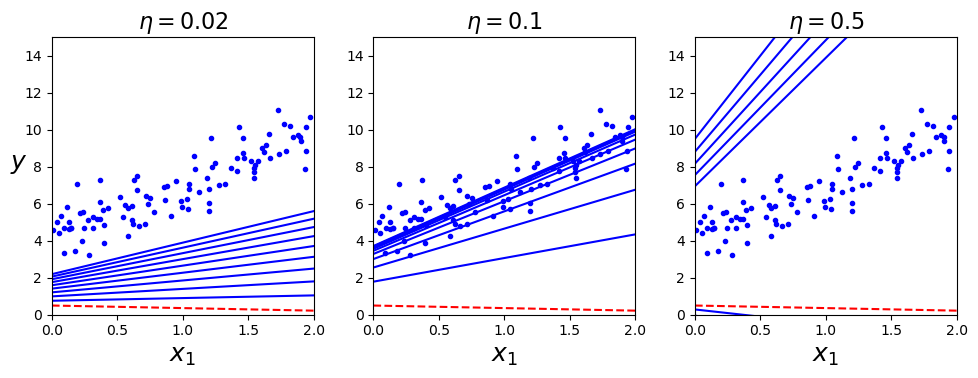

In [14]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()


In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)


In [18]:
print(m)


100


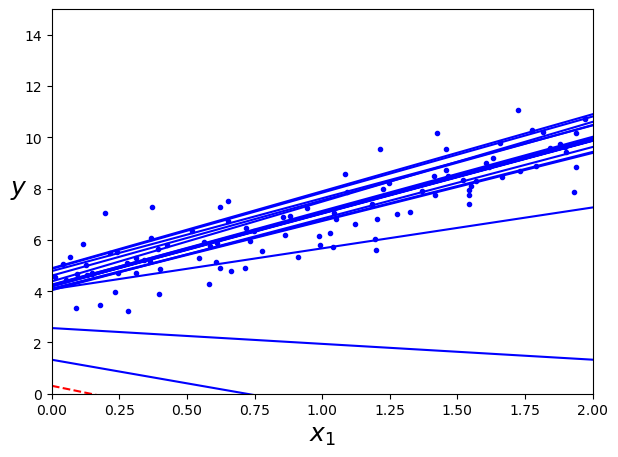

In [19]:
n_epochs = 50  # number of times the algorithm "sees" the whole dataset
t0, t1 = 5, 50  # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)  # starting at 1/10 then decreasing towards 0


theta = np.random.randn(2, 1)  # random initialization

# loop over one epoch : epoch+=1 once the algorithm has gone through the whole dataset
for epoch in range(n_epochs):
    for i in range(m):  # looping over the dataset
        if epoch == 0 and i < 20:  # plotting the first 20 iterations in the first epoch
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)  # choosing a random index
        # selecting instance corresponding to random index
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # calculating gradient
        eta = learning_schedule(epoch * m + i)  # tweaking learning rate
        theta = theta - eta * gradients  # changing parameters
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()
